# Reprojecting 

We will learn how to join dataframes and will apply this to creating a cloropleth map with `geopandas`

**About the data**

The first dataset we will use is a list of Arctic communities and their location [1] created by the Alaska Native Tribal Health Consortium. This data comes in a GeoJSON file with the following attributes:

- name: name of Arctic community,
- population: population of Arctic community, as of 2022
- country: country that the Arctic community falls within (see dataset metadata for the codes)
- geoname-id: numeric codes that uniquely identify all administrative/legal and statistical geographic areas for which the Census Bureau tabulates data

The second dataset is Natural Earth’s medium-scale cultural boundaries data for countries (1:50m). We can obtain this dataset by downloading the shapefile. Natural Earth is a public domain dataset with free, ready-to-use data for creating maps.

The third dataset we will use is a CSV file with the country codes and names of the Arctic countries in the Arctic communities dataset. This dataset was created for educational purposes for this lesson based on the metadata of the Arctic communities dataset and the country names in Natural Earth’s dataset. It can be accessed here. 

## Import Data 

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Import countries polygons
fp = os.path.join('data','ne_50m_admin_0_countries','ne_50m_admin_0_countries.shp')
countries = gpd.read_file(fp)

# Simplify column names 
countries.columns = countries.columns.str.lower()

# Select columns for analysis
countries = countries[['admin','type','geometry']]

countries.head()

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,Sovereign country,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,Sovereign country,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

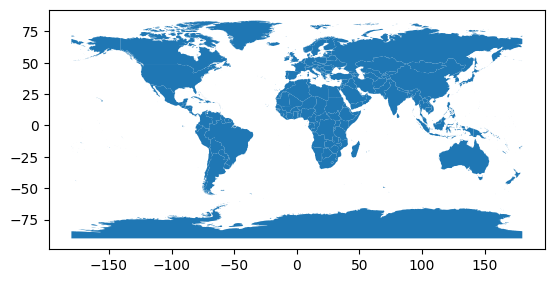

In [7]:
# Quick view
countries.plot()

Next, we import the Arctic communities data. Similar to how we previously used `pandas.read_csv()`, we can read in the Arctic communities GeoJSON data directly from the data repository using `geopandas.read_file()`:

In [8]:
# Import Arctic communities data
URL = 'https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4'
communities = gpd.read_file(URL)

communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


The CRS of the `communities` is EPSG:4326. Remember all GeoJSON files are given in this CRS and all points are expressed in longitude and latitude units of decimal degrees.

In [9]:
print(countries.crs)

epsg:4326


Since the CRSs of our geospatial data match, it is easy to take a quick look at our communities data by plotting it on top of the counties dataframe

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


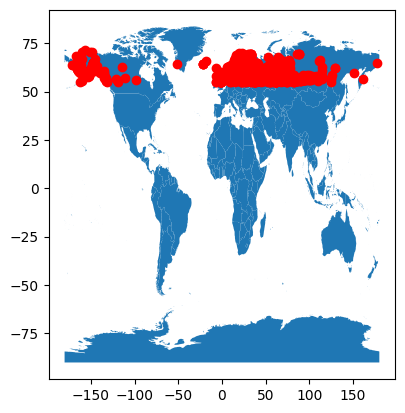

In [10]:
# Verify CRSs match
assert countries.crs == communities.crs

fig, ax = plt.subplots()
countries.plot(ax=ax)
communities.plot(ax=ax, color='red')
plt.show()